<a href="https://colab.research.google.com/github/cristobalperezp/Finanzas_II/blob/main/Finanzas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2: IN 5303 Finanzas II
**Profesor:** J. Miguel Cruz.

**Auxiliar:** Nicolás Besser.

**Integrantes:** Cristóbal Pérez, Felipe Moreno, Jesús Farías.


Usted trabaja para una gestora de fondos y le piden construir un fondo de renta variable y renta fija, balanceado, y que sea atractivo para sus clientes. Para esto usted posee los siguientes índices de renta fija y renta variable, nacionales e internacionales.



*   **Renta Variable Nacional:** IPSA
*   **Renta Variable Internacional:** EEUU, Europa Desarrollado, Asia Emergente, Asia desarrollado,
Latam.
*   **Renta Fija Nacional Estatal:** Deuda Chilena CLP Duration <5Y, Deuda Chilena UF Duration <5Y, Deuda Chilena Gob Dur >5Y.
*   **Renta Fija Nacional Privada:** Deuda Chilena Corporativa
*   **Renta Fija Internacional:** Deuda Corporativa Emergente, Deuda Corporativa Desarrollada High Yield, Deuda Corporativa Desarrollada Investment Grade, Deuda Soberana EEUU 7y-10y.

Los índices de renta internacional y nacional ya se encuentran ajustados a pesos chilenos.



##Parte 1:

###1.1 Retornos Logarítmicos

In [ ]:
# Se cargan las librerías a utilizar para el trabajo con DataFrames:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pandas_datareader import data

In [ ]:
# Se Cargan los datos y se leen:
!git clone https://github.com/cristobalperezp/Finanzas_II.git
df = pd.read_excel('/content/Finanzas_II/DataTarea2.xlsx', index_col = 'Fecha')
# Se crea una copia del DataFrame
df2 = df.copy()
# Se filtran los datos hasta finales de 2019
df2 = df2['2000-03-01':'2019-12-31']
df2

Cloning into 'Finanzas_II'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


,IPSA,Latam,USA,Europe,Asia Dev,Asia EM,EMEA,CLP Dur < 5Y,UF Dur < 5Y,Gob Dur >5Y,Corporativos Chile,Corporativos EM,Corporativos Dev HY,Corporativos Dev IG,Treasury
Fecha,,,,,,,,,,,,,,,
2000-03-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN
2000-03-02,1.002014,1.022553,1.004882,1.018759,0.995418,1.023291,0.994684,0.999117,0.999117,1.000805,0.999235,NaN,0.999490,0.999503,NaN
2000-03-03,1.014114,1.044147,1.023251,1.024850,0.986854,1.009358,0.988018,0.998332,0.998332,0.999240,0.998297,NaN,0.999818,0.999503,NaN
2000-03-06,1.008601,1.037544,1.012330,1.035059,0.974942,1.019141,0.994535,1.002083,1.002083,1.003659,1.004439,NaN,1.002307,1.001649,NaN
2000-03-07,0.992485,1.040493,0.990231,1.027955,0.998498,1.020036,1.002051,1.003313,1.003313,1.017161,1.015878,NaN,1.007159,1.006099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,4.422819,6.420718,5.046535,3.429653,2.936336,5.270631,4.066923,3.538155,3.681988,5.318570,5.652470,5.436940,4.891316,4.158262,2.970853
2019-12-26,4.377012,6.471263,5.051815,3.406933,2.930717,5.260287,4.047126,3.540976,3.684525,5.325987,5.656915,5.415967,4.875099,4.142502,2.960344
2019-12-27,4.394475,6.469727,5.060986,3.442713,2.947877,5.307845,4.082177,3.545426,3.687864,5.331494,5.668223,5.432240,4.892332,4.157598,2.973025


Recordando que los retornos logarítmicos se definen como:

$$r_i = \frac{Ln(\frac{P_i}{P_{i-1}})}{t_i-t_{i-1}}$$

In [ ]:
# Se crea una función para obtener los retornos logarítmicos, la cual recibe una columna y devuelve el vector de retornos logarítmicos
def log_r(columna):
  log_retorno = np.zeros(len(columna))
  for i in range(len(columna)-1):
    log_retorno[i+1] = np.log(columna[i+1]/columna[i])
  return log_retorno

In [ ]:
# Se define un vector con el nombre de las nuevas columnas, correspondientes a los retornos logarítmicos
log_variables = ['log_IPSA', 'log_Latam', 'log_USA', 'log_Europe', 'log_Asia Dev', 'log_Asia EM', 'log_EMEA',
       'log_CLP Dur < 5Y', 'log_UF Dur < 5Y', 'log_Gob Dur >5Y', 'log_Corporativos Chile',
       'log_Corporativos EM', 'log_Corporativos Dev HY', 'log_Corporativos Dev IG',
       'log_Treasury']
df_log = pd.DataFrame(index = df2.index)
for i in range(len(log_variables)):
  df_log[log_variables[i]] = log_r(df2[df2.columns[i]])
df_log = df_log.iloc[1:]
df_log

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
Fecha,,,,,,,,,,,,,,,
2000-03-02,0.002012,0.022302,0.004870,0.018585,-0.004593,0.023024,-0.005330,-0.000883,-0.000883,0.000805,-0.000765,NaN,-0.000510,-0.000497,NaN
2000-03-03,0.012003,0.020898,0.018115,0.005962,-0.008640,-0.013710,-0.006725,-0.000786,-0.000786,-0.001565,-0.000939,NaN,0.000329,0.000000,NaN
2000-03-06,-0.005451,-0.006343,-0.010730,0.009912,-0.012144,0.009646,0.006575,0.003751,0.003751,0.004413,0.006134,NaN,0.002486,0.002144,NaN
2000-03-07,-0.016108,0.002838,-0.022071,-0.006887,0.023874,0.000878,0.007528,0.001226,0.001226,0.013363,0.011324,NaN,0.004829,0.004433,NaN
2000-03-08,0.015227,0.014538,0.011304,-0.008313,-0.001204,0.006006,0.006744,-0.001467,-0.001467,-0.016221,-0.012778,NaN,0.004246,0.004000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,-0.003345,-0.003345,-0.003345,0.000480,-0.005502,-0.002830,-0.005446,0.000074,0.000068,0.000000,0.000073,-0.003345,-0.003345,-0.003311,-0.003345
2019-12-26,-0.010411,0.007841,0.001046,-0.006647,-0.001915,-0.001965,-0.004880,0.000797,0.000689,0.001394,0.000786,-0.003865,-0.003321,-0.003797,-0.003544
2019-12-27,0.003982,-0.000237,0.001814,0.010448,0.005838,0.009000,0.008623,0.001256,0.000906,0.001033,0.001997,0.003000,0.003529,0.003638,0.004274


In [ ]:
#df_log.to_excel('Retornos Logaritmicos.xlsx')

###1.2 Volatilidades Mensuales

In [ ]:
volatilidades_diarias = {}
for i in range(len(log_variables)):
  volatilidades_diarias[log_variables[i]] = np.sqrt(statistics.variance(df_log[log_variables[i]].dropna()))
df_vol_diarias = pd.DataFrame(data = volatilidades_diarias, index=[1])
df_vol_diarias

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
1,0.010636,0.014907,0.011636,0.012091,0.012252,0.012828,0.013559,0.001404,0.001621,0.002709,0.002251,0.006285,0.006269,0.006649,0.007873


In [ ]:
volatilidades_mensuales = {}

for i in range(len(log_variables)):
  volatilidades_mensuales[log_variables[i]] = volatilidades_diarias[log_variables[i]]*np.sqrt(22)
df_vol_mensuales = pd.DataFrame(data = volatilidades_mensuales, index=[1])
df_vol_mensuales

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
1,0.049885,0.069918,0.054578,0.05671,0.057469,0.06017,0.063598,0.006586,0.007601,0.012706,0.010559,0.02948,0.029406,0.031188,0.036929


In [ ]:
#volatilidades_anuales = {}

#for i in range(len(log_variables)):
# volatilidades_anuales[log_variables[i]] = volatilidades_diarias[log_variables[i]]*np.sqrt(252)
#df_vol_anuales = pd.DataFrame(data = volatilidades_anuales, index=[1])
#df_vol_anuales

In [ ]:
#df_vol_diarias.to_excel('Volatilidades Diarias.xlsx')
#df_vol_mensuales.to_excel('Volatilidades Mensuales.xlsx')
#df_vol_anuales.to_excel('Volatilidades Anuales.xlsx')


###1.2 Correlaciones

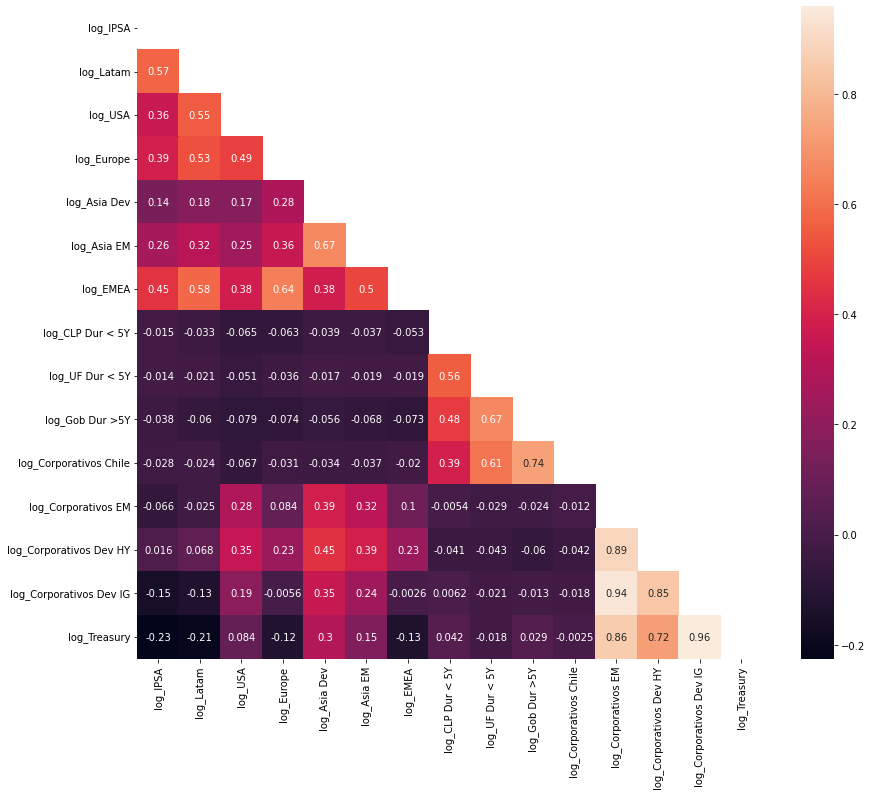

In [ ]:
corr = df_log.corr()
plt.figure(figsize=(14,12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, xticklabels= corr.columns.values, yticklabels= corr.columns.values, annot=True)

### 1.3 Retornos Esperados Mensuales y Anuales

In [ ]:
retornos_mensuales = {}

for i in range(len(log_variables)):
  retornos_mensuales[log_variables[i]] = df_log[log_variables[i]].mean()*22
df_ret_mensuales = pd.DataFrame(data = retornos_mensuales , index=[1])
df_ret_mensuales

NameError: ignored

In [ ]:
retornos_anuales = {}

for i in range(len(log_variables)):
  retornos_anuales[log_variables[i]] = df_log[log_variables[i]].mean()*252
df_ret_anuales = pd.DataFrame(data = retornos_anuales , index=[1])
df_ret_anuales

In [ ]:
#df_ret_mensuales.to_excel('Retornos Mensuales.xlsx')
#df_ret_anuales.to_excel('Retornos Anuales.xlsx')

##Parte 2:

### 2.4 Perfil de Inversión 

**Plantear un portafolio de inversión, considerando activos con menor correlación y con más historia (que no tengan datos nulos)**

In [ ]:
df_log.isna().sum()

log_IPSA                      0
log_Latam                     0
log_USA                       0
log_Europe                    0
log_Asia Dev                  0
log_Asia EM                   0
log_EMEA                      0
log_CLP Dur < 5Y              0
log_UF Dur < 5Y               0
log_Gob Dur >5Y               0
log_Corporativos Chile        0
log_Corporativos EM         478
log_Corporativos Dev HY       0
log_Corporativos Dev IG       0
log_Treasury               1262
dtype: int64

In [ ]:
df_log.columns

Index(['log_IPSA', 'log_Latam', 'log_USA', 'log_Europe', 'log_Asia Dev',
       'log_Asia EM', 'log_EMEA', 'log_CLP Dur < 5Y', 'log_UF Dur < 5Y',
       'log_Gob Dur >5Y', 'log_Corporativos Chile', 'log_Corporativos EM',
       'log_Corporativos Dev HY', 'log_Corporativos Dev IG', 'log_Treasury'],
      dtype='object')

In [ ]:
indices = ['log_IPSA', 'log_Latam', 'log_USA', 'log_Europe', 'log_Asia Dev',
       'log_Asia EM', 'log_EMEA', 'log_CLP Dur < 5Y', 'log_UF Dur < 5Y',
       'log_Gob Dur >5Y', 'log_Corporativos Chile',
       'log_Corporativos Dev HY', 'log_Corporativos Dev IG']

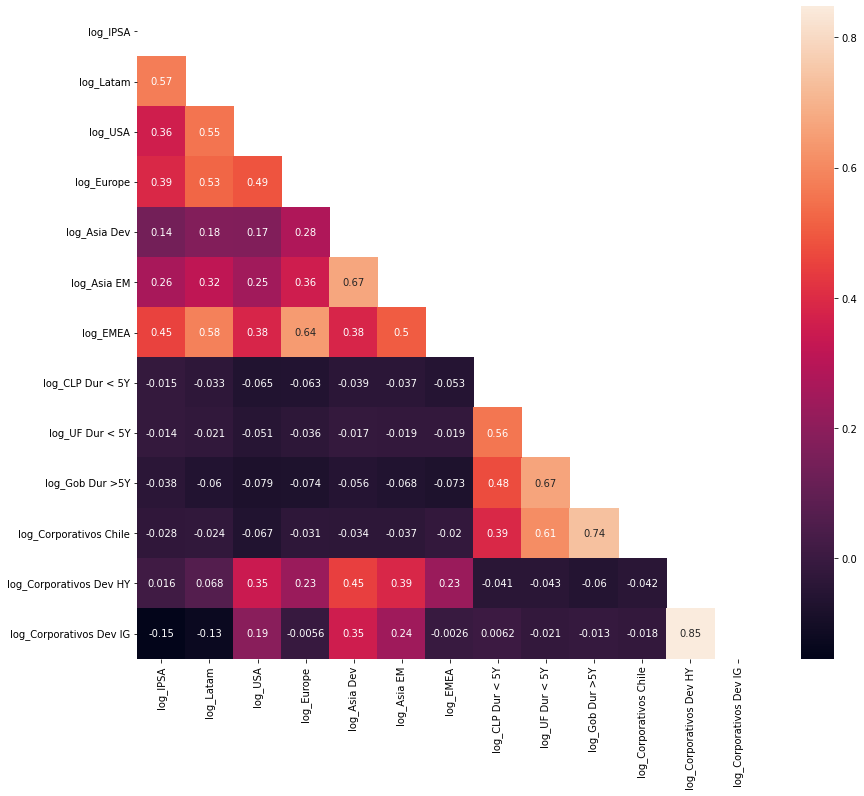

In [ ]:
corr = df_log[indices].corr()
plt.figure(figsize=(14,12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, xticklabels= corr.columns.values, yticklabels= corr.columns.values, annot=True)

Los indices a invertir son: 

In [ ]:
indices = ['log_IPSA', 'log_USA', 'log_Europe', 'log_Asia Dev',
       'log_Asia EM','log_UF Dur < 5Y', 
       'log_Corporativos Dev HY']

### 2.4 Mínima Varianza sin Venta Corta

In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.3 MB/s 
     |████████████████████████████████| 2.8 MB 7.0 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [ ]:
cov_portafolio = portafolio.cov()*252
r_anuales = portafolio.mean()*252

In [ ]:
#df_r_anuales = portafolio.mean()*252
#portafolio.to_excel('Portafolio.xlsx')
#cov_portafolio.to_excel('Covarianzas Portafolio.xlsx')
#df_r_anuales.to_excel('Retornos Anuales.xlsx')

In [ ]:
ef = EfficientFrontier(r_anuales, cov_portafolio,weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('log_IPSA', 0.01877), ('log_USA', 0.00306), ('log_Europe', 0.00474), ('log_Asia Dev', 0.0), ('log_Asia EM', 0.0), ('log_UF Dur < 5Y', 0.90825), ('log_Corporativos Dev HY', 0.06518)])
Expected annual return: 6.5%
Annual volatility: 2.4%
Sharpe Ratio: 1.84


(0.0647253464718309, 0.02431506151379246, 1.839409143442262)

###2.5 Correcciones y Mejoras FALTA

**Se pueden agregar índices al portafolio, tomar datos más actuales, quitar índices, etc, elgir una y ver qué pasa**

###2.6 Método 2: Target Risk

In [ ]:
ef = EfficientFrontier(r_anuales, cov_portafolio,weight_bounds=(-1,1))
weights = ef.efficient_risk(0.05) 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('log_IPSA', 0.06965), ('log_USA', 0.0454), ('log_Europe', -0.08886), ('log_Asia Dev', -0.22832), ('log_Asia EM', 0.16581), ('log_UF Dur < 5Y', 0.66787), ('log_Corporativos Dev HY', 0.36846)])
Expected annual return: 7.6%
Annual volatility: 5.0%
Sharpe Ratio: 1.12


(0.07579794983378085, 0.05000000005488608, 1.1159589954506048)

###2.7 Mínima Varianza con Venta Corta

In [ ]:
ef = EfficientFrontier(r_anuales, cov_portafolio,weight_bounds=(-1,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('log_IPSA', 0.01945), ('log_USA', 0.00289), ('log_Europe', 0.00547), ('log_Asia Dev', 0.0002), ('log_Asia EM', -0.00315), ('log_UF Dur < 5Y', 0.9079), ('log_Corporativos Dev HY', 0.06725)])
Expected annual return: 6.5%
Annual volatility: 2.4%
Sharpe Ratio: 1.84


(0.06469714813455359, 0.024309154315137714, 1.8386961370647077)

###2.7 Frontera Eficiente

In [ ]:
import copy

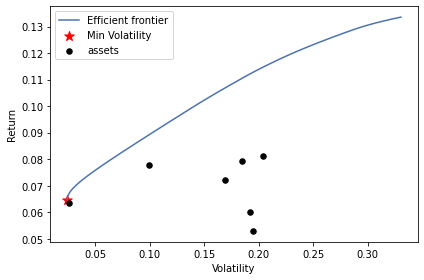

In [ ]:
ef = EfficientFrontier(r_anuales, cov_portafolio,weight_bounds=(-1,1))

fig, ax = plt.subplots()
ef_min_volatility = copy.deepcopy(ef)
ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")


plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
#ef = EfficientFrontier(r_anuales, cov_portafolio,weight_bounds=(-1,1))
#fig, ax = plt.subplots()
#ef_min_volatility = copy.deepcopy(ef)
#plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
#ef_min_volatility.min_volatility()
#ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
#ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Generate random portfolios
#n_samples = 10000
#w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
#rets = w.dot(ef.expected_returns)
#stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
#sharpes = rets / stds
#ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
#ax.set_title("Efficient Frontier with random portfolios")
#ax.legend()
#plt.tight_layout()
#plt.show()

###2.7 Comparación

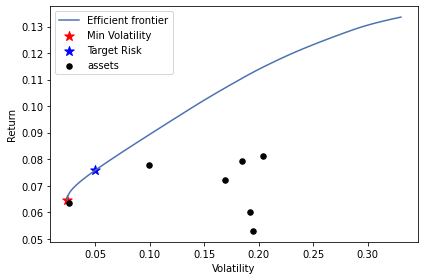

In [ ]:
ef = EfficientFrontier(r_anuales, cov_portafolio,weight_bounds=(-1,1))

fig, ax = plt.subplots()

ef_min_volatility = copy.deepcopy(ef)
ef_min_volatility.min_volatility()

ef_risk = copy.deepcopy(ef)
ef_risk.efficient_risk(0.05) 

ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
ret_tangent_risk, std_tangent_risk, _ = ef_risk.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")
ax.scatter(std_tangent_risk, ret_tangent_risk, marker="*", s=100, c="b", label="Target Risk")

plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

###2.8 Elección de Cartera FALTA

## Parte 3:

###3.1 Datos de 2020 a la fecha




In [ ]:
#2020 a la fecha.
df4= df.copy()
df4 = df4['2020-01-01':'2022-02-28']
df4

,IPSA,Latam,USA,Europe,Asia Dev,Asia EM,EMEA,CLP Dur < 5Y,UF Dur < 5Y,Gob Dur >5Y,Corporativos Chile,Corporativos EM,Corporativos Dev HY,Corporativos Dev IG,Treasury
Fecha,,,,,,,,,,,,,,,
2020-01-01,4.414617,6.494558,5.090257,3.448311,2.969811,5.330439,4.110463,3.551551,3.691970,5.336901,5.678611,5.475968,4.941338,4.181717,2.990091
2020-01-02,4.529623,6.623074,5.115971,3.459411,2.971401,5.374666,4.123065,3.555253,3.697959,5.352792,5.688109,5.467461,4.928975,4.176718,2.987546
2020-01-03,4.580262,6.635295,5.118522,3.471452,2.996583,5.392545,4.139684,3.558270,3.702733,5.354789,5.700079,5.513833,4.959890,4.222440,3.029604
2020-01-06,4.627602,6.733901,5.246896,3.536057,3.023897,5.448779,4.189486,3.559031,3.704255,5.342958,5.705874,5.634408,5.070649,4.305409,3.090591
2020-01-07,4.645672,6.635167,5.212098,3.516312,3.041473,5.459933,4.157563,3.560164,3.705861,5.339769,5.709390,5.615228,5.045335,4.281996,3.074495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,4.347410,6.165061,7.406781,4.231514,3.455595,6.572418,4.843681,3.643536,3.883821,5.159479,5.837012,6.006530,5.409949,4.493621,3.234425
2022-02-23,4.266137,6.089070,7.244129,4.205712,3.446516,6.566163,4.787973,3.647205,3.892796,5.173021,5.848282,5.961982,5.390706,4.460577,3.215877
2022-02-24,4.359112,6.175280,7.628516,4.112615,3.486945,6.571291,4.477876,3.657608,3.906880,5.218975,5.877445,6.074529,5.535866,4.619430,3.337983


###3.1 Retornos Logarítmicos

In [ ]:
log_variables = ['log_IPSA', 'log_Latam', 'log_USA', 'log_Europe', 'log_Asia Dev', 'log_Asia EM', 'log_EMEA',
       'log_CLP Dur < 5Y', 'log_UF Dur < 5Y', 'log_Gob Dur >5Y', 'log_Corporativos Chile',
       'log_Corporativos EM', 'log_Corporativos Dev HY', 'log_Corporativos Dev IG',
       'log_Treasury']
df_log4 = pd.DataFrame(index = df4.index)
for i in range(len(log_variables)):
  df_log4[log_variables[i]] = log_r(df4[df4.columns[i]])
df_log4 = df_log4.iloc[1:]
df_log4

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
Fecha,,,,,,,,,,,,,,,
2020-01-02,0.025718,0.019595,0.005039,0.003214,0.000535,0.008263,0.003061,0.001042,0.001621,0.002973,0.001671,-0.001555,-0.002505,-0.001196,-0.000851
2020-01-03,0.011118,0.001843,0.000498,0.003475,0.008439,0.003321,0.004023,0.000848,0.001290,0.000373,0.002102,0.008446,0.006253,0.010888,0.013980
2020-01-06,0.010282,0.014752,0.024771,0.018439,0.009074,0.010374,0.011959,0.000214,0.000411,-0.002212,0.001016,0.021632,0.022085,0.019459,0.019931
2020-01-07,0.003897,-0.014771,-0.006654,-0.005600,0.005796,0.002045,-0.007649,0.000318,0.000434,-0.000597,0.000616,-0.003410,-0.005005,-0.005453,-0.005222
2020-01-08,-0.002445,-0.007191,-0.005088,-0.010324,-0.020102,-0.016298,-0.006640,-0.000361,-0.000148,-0.001000,0.000095,-0.009724,-0.010587,-0.012191,-0.013360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,-0.014009,0.004013,-0.017474,-0.006837,-0.022828,-0.022538,-0.003683,0.000509,0.000763,0.002082,0.001060,-0.011414,-0.008384,-0.009636,-0.008417
2022-02-23,-0.018872,-0.012403,-0.022205,-0.006116,-0.002631,-0.000952,-0.011568,0.001006,0.002308,0.002621,0.001929,-0.007444,-0.003563,-0.007381,-0.005751
2022-02-24,0.021560,0.014059,0.051702,-0.022384,0.011662,0.000781,-0.066958,0.002848,0.003611,0.008844,0.004974,0.018702,0.026572,0.034993,0.037267


###3.1 Volatilidades






In [ ]:
volatilidades_diarias4 = {}
for i in range(len(log_variables)):
  volatilidades_diarias4[log_variables[i]] = np.sqrt(statistics.variance(df_log4[log_variables[i]].dropna()))
df_vol_diarias4 = pd.DataFrame(data = volatilidades_diarias4, index=[1])
df_vol_diarias4

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
1,0.020011,0.020005,0.015741,0.013418,0.012233,0.012689,0.013222,0.002315,0.002271,0.006408,0.003171,0.008103,0.008136,0.008622,0.00955


In [ ]:
volatilidades_mensuales4 = {}

for i in range(len(log_variables)):
  volatilidades_mensuales4[log_variables[i]] = volatilidades_diarias4[log_variables[i]]*np.sqrt(22)
df_vol_mensuales4 = pd.DataFrame(data = volatilidades_mensuales4, index=[1])
df_vol_mensuales4

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
1,0.093861,0.093832,0.073833,0.062935,0.05738,0.059517,0.062019,0.01086,0.010652,0.030056,0.014875,0.038004,0.038162,0.04044,0.044795


In [ ]:
volatilidades_anuales4 = {}

for i in range(len(log_variables)):
  volatilidades_anuales4[log_variables[i]] = volatilidades_diarias4[log_variables[i]]*np.sqrt(252)
df_vol_anuales4 = pd.DataFrame(data = volatilidades_anuales4, index=[1])
df_vol_anuales4

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
1,0.317668,0.317571,0.249886,0.212999,0.1942,0.201433,0.2099,0.036756,0.036052,0.101722,0.050345,0.128624,0.129157,0.136866,0.151608


###3.1 Correlación

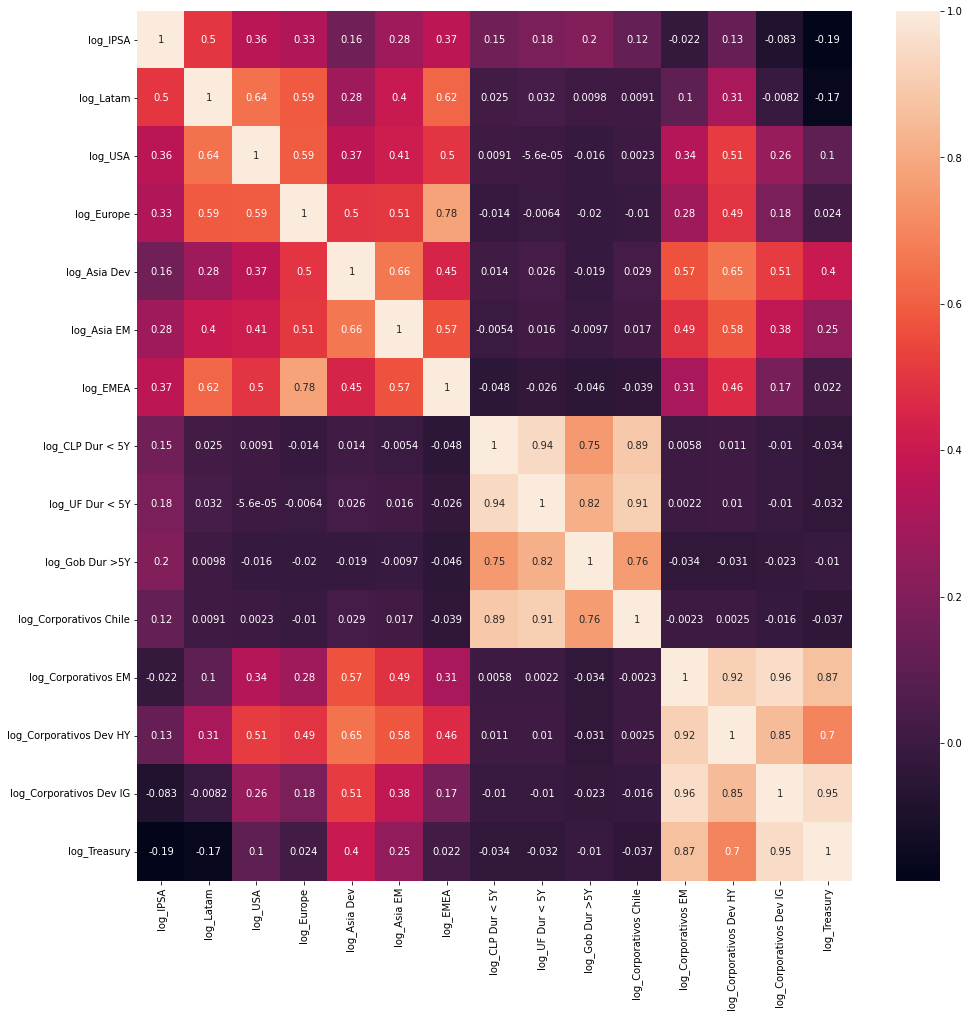

In [ ]:
corr4 = df_log4.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr4, xticklabels= corr4.columns.values, yticklabels= corr4.columns.values, annot=True)

###3.1 Retornos

In [ ]:
retornos_mensuales4 = {}

for i in range(len(log_variables)):
  retornos_mensuales4[log_variables[i]] = df_log4[log_variables[i]].mean()*22
df_ret_mensuales4 = pd.DataFrame(data = retornos_mensuales4 , index=[1])
df_ret_mensuales4

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
1,0.000528,-0.001905,0.015638,0.007734,0.005944,0.007655,0.003014,0.001197,0.002302,-0.000475,0.001476,0.002499,0.00387,0.003184,0.003715


In [ ]:
retornos_anuales4 = {}

for i in range(len(log_variables)):
  retornos_anuales4[log_variables[i]] = df_log4[log_variables[i]].mean()*252
df_ret_anuales4 = pd.DataFrame(data = retornos_anuales4 , index=[1])
df_ret_anuales4

,log_IPSA,log_Latam,log_USA,log_Europe,log_Asia Dev,log_Asia EM,log_EMEA,log_CLP Dur < 5Y,log_UF Dur < 5Y,log_Gob Dur >5Y,log_Corporativos Chile,log_Corporativos EM,log_Corporativos Dev HY,log_Corporativos Dev IG,log_Treasury
1,0.006046,-0.021816,0.17913,0.088591,0.068091,0.087682,0.034519,0.013709,0.026364,-0.005437,0.016909,0.028619,0.044334,0.036471,0.042558


###3.2 Portafolio 2020 - actualidad


Recordamos nuestros indices de la P2

In [ ]:
indices

['log_IPSA',
 'log_USA',
 'log_Europe',
 'log_Asia Dev',
 'log_Asia EM',
 'log_UF Dur < 5Y',
 'log_Corporativos Dev HY']

In [ ]:
portafolio4 = df_log4[indices]

In [ ]:
cov_portafolio4 = portafolio4.cov()*252

In [ ]:
df_r_anuales4 = portafolio4.mean()*252

###3.2 Varianza portafolio 2020 - actualidad

In [ ]:
varianza_portafolio4 = np.dot(pesos.T, np.dot(cov_portafolio4, pesos))
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio4*100,1))+"%"

'La varianza del portafolio es: 1.8%'

###3.2 Volatilidad portafolio 2020 - actualidad

In [ ]:
volatilidad_portafolio4 = np.sqrt(varianza_portafolio4)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio4*100,1))+"%"

'La volatilidad del portafolio es: 13.4%'

###3.2 Retorno portafolio 2020 - actualidad

In [ ]:
r_anuales4 = portafolio4.mean()*252
retorno_portafolio4 = np.sum(pesos*r_anuales4)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio4*100,3)) + '%'

'El retorno anual del portafolio es: 7.146%'

###3.2 Comparación con portafolio parte 2

In [ ]:
"La varianza para el portafolio con la información hasta 2019 es:" + " "+  str(round(varianza_portafolio*100,1))+"%"+", mientras que para el portafolio con información desde 2020 hasta la actualidad es:" +" "+ str(round(varianza_portafolio4*100,1))+"%"

'La varianza para el portafolio con la información hasta 2019 es: 1.0%, mientras que para el portafolio con información desde 2020 hasta la actualidad es: 1.8%'

In [ ]:
"La volatilidad para el portafolio con la información hasta 2019 es:" + " "+  str(round(volatilidad_portafolio*100,1))+"%"+", mientras que para el portafolio con información desde 2020 hasta la actualidad es:" +" "+ str(round(volatilidad_portafolio4*100,1))+"%"

'La volatilidad para el portafolio con la información hasta 2019 es: 10.0%, mientras que para el portafolio con información desde 2020 hasta la actualidad es: 13.4%'

In [ ]:
"El retorno anual para el portafolio con la información hasta 2019 es:" + " "+  str(round(retorno_portafolio*100,1))+"%"+", mientras que para el portafolio con información desde 2020 hasta la actualidad es:" +" "+ str(round(retorno_portafolio4*100,1))+"%"

'El retorno anual para el portafolio con la información hasta 2019 es: 7.0%, mientras que para el portafolio con información desde 2020 hasta la actualidad es: 7.1%'